# Tugas Besar
# Mata Kuliah: Pembelajaran Mesin/CS1213

**Anggota:**
- Muhammad Karov Ardava Barus (103052300001)
- Akhmad Muzakkii (103052300067)
- Muhammad Zikra Al Rizkya (103052300076)


## Import Libraries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from pyswarms.single.global_best import GlobalBestPSO

# metode klasifikasi yang sudah dipelajari
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [106]:
df = pd.read_excel('CAD alizadeh.xls')

# split data menjadi train dan test
print(f'Panjang data: {len(df)} baris dan {len(df.columns)} kolom')
df.head()

Panjang data: 303 baris dan 56 kolom


,No,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,1,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,N,Cad
1,2,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,N,Cad
2,3,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,mild,Cad
3,4,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,5,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,Severe,Normal


## Exploratory Data Analysis

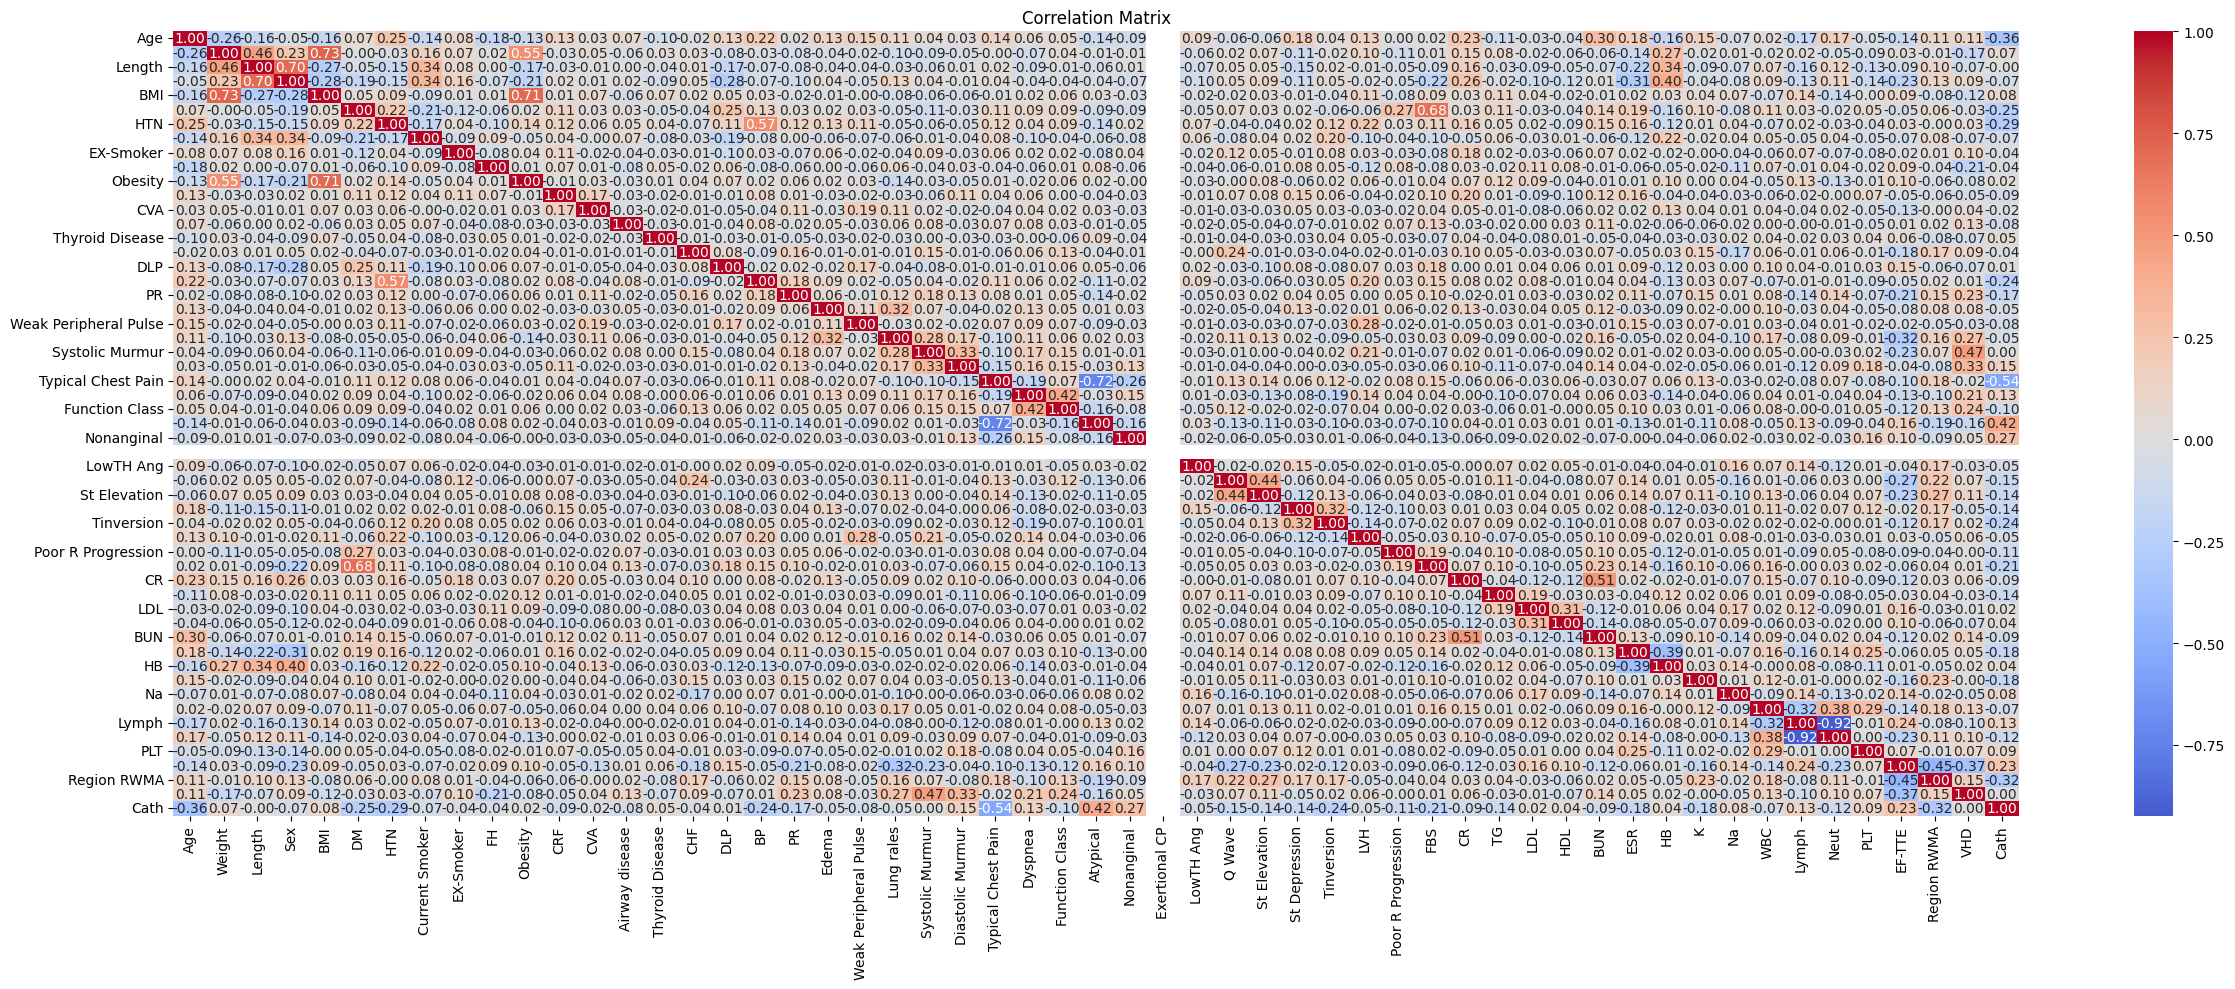

In [185]:
df_copy = df.copy()

# encode kolom kategorikal
le = LabelEncoder()
for col in df_copy.columns:
    if df_copy[col].dtype == 'O':  # object type (categorical)
        df_copy[col] = le.fit_transform(df_copy[col])

# hitung matriks korelasi
corr_matrix = df_copy.corr()

# plot matriks korelasi
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [108]:
cat_cols = [var for var in df.columns if df[var].dtype == 'O'] # mendapatkan kolom yang bertipe object
num_cols = [var for var in df.columns if df[var].dtype != 'O'] # mendapatkan kolom yang bertipe numerik

print(f'Kolom kategorikal: {cat_cols}')
print(f'Kolom numerik: {num_cols}')

Kolom kategorikal: ['Sex', 'Obesity', 'CRF', 'CVA', 'Airway disease', 'Thyroid Disease', 'CHF', 'DLP', 'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur', 'Diastolic Murmur', 'Dyspnea', 'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'LVH', 'Poor R Progression', 'VHD', 'Cath']
Kolom numerik: ['Age', 'Weight', 'Length', 'BMI', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'BP', 'PR', 'Edema', 'Typical Chest Pain', 'Function Class', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE', 'Region RWMA']


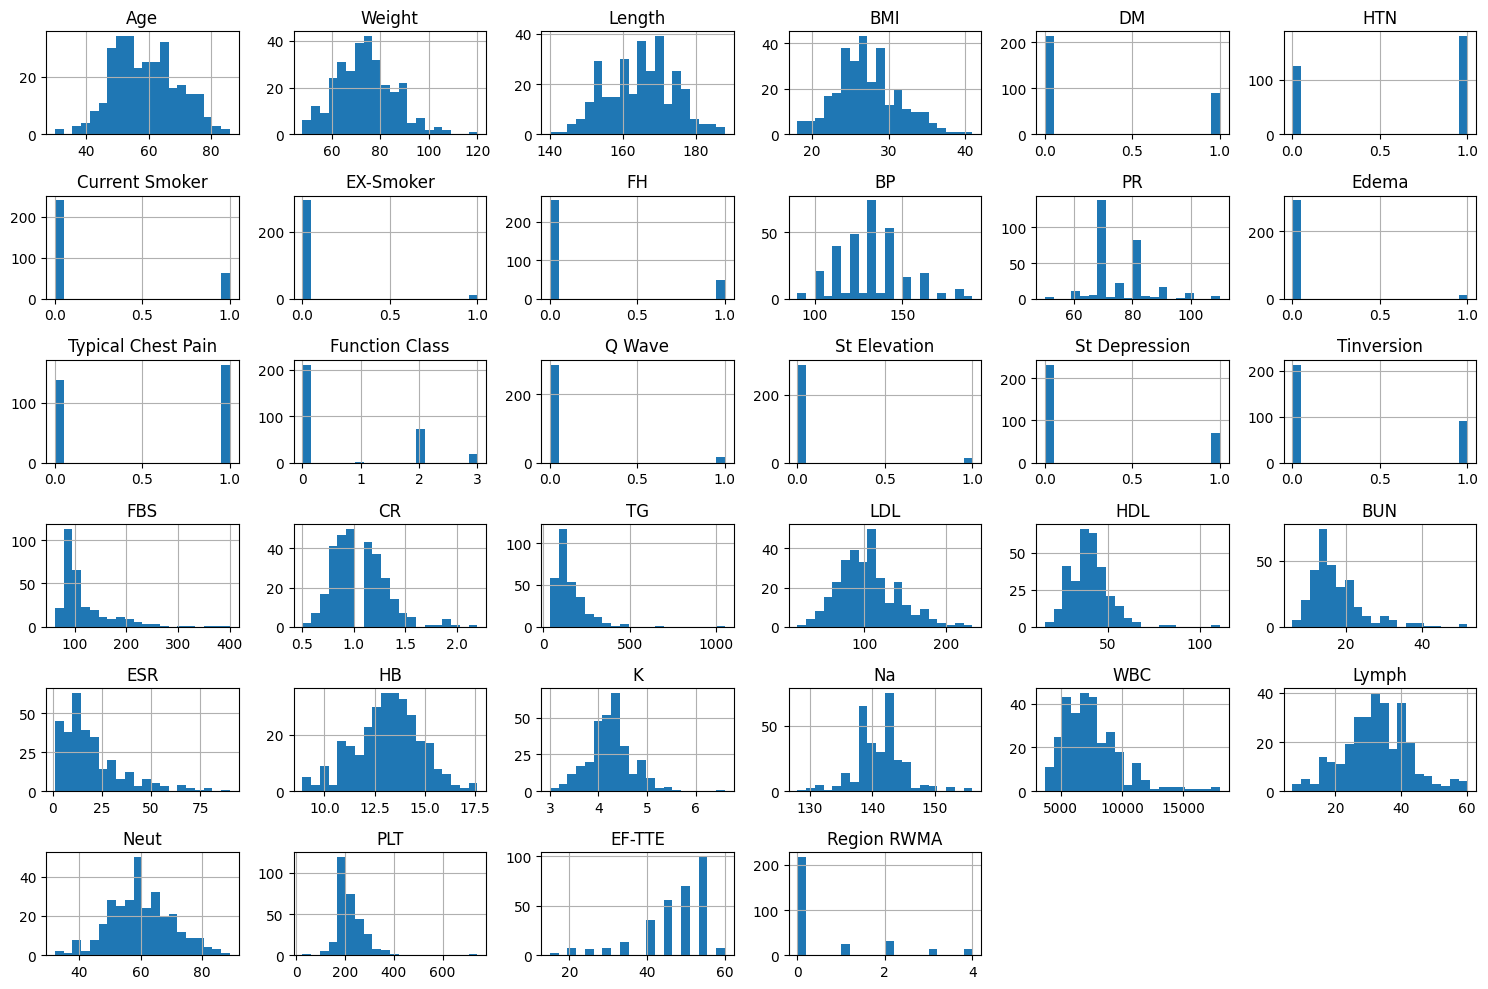

In [188]:
df[num_cols].hist(bins=20, figsize=(15, 10));
plt.tight_layout()
plt.title('Histogram data numerik')
plt.show()

In [241]:
df.describe(include='all')

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath,Cluster
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,0.580858,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,0.696370,0.019802,0.016502,0.036304,0.023102,0.003300,0.369637,129.554455,75.141914,0.039604,0.016502,0.036304,0.135314,0.029703,0.541254,0.442244,0.663366,0.306931,0.052805,0.0,0.006601,0.052805,0.046205,0.234323,0.297030,0.066007,0.029703,119.184818,1.055611,150.343234,104.643564,40.233993,17.501650,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462,0.778878,0.287129,1.660066
std,10.392278,11.987358,9.327661,0.494235,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,0.460586,0.139550,0.127605,0.187354,0.150477,0.057448,0.483505,18.938105,8.911801,0.195350,0.127605,0.187354,0.342624,0.170047,0.499120,0.497475,1.032042,0.461983,0.224015,0.0,0.081110,0.224015,0.210275,0.424276,0.457706,0.248704,0.170047,52.079653,0.264296,97.959451,35.396688,10.559077,6.956761,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531,0.755082,0.453171,1.184875
min,30.000000,48.000000,140.000000,0.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.500000,37.000000,18.000000,15.900000,6.000000,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,65.000000,158.000000,0.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.500000,0.900000,90.000000,80.000000,33.500000,13.000000,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,74.000000,165.000000,1.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,1.000000,122.000000,100.000000,39.000000,16.000000,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000,1.000000,0.000000,2.000000
75%,66.000000,81.000000,171.000000,1.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,140.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000

## Data Preprocessing

In [107]:
# menghapus kolom yang tidak berguna "No"
df.drop(columns=['No'], inplace=True)

# melihat missing values dan duplicated values
print(f'Missing values: {df.isnull().sum().sum()}')

# melihat data duplikat
print(f'Duplicated values: {df.duplicated().sum()}')

Missing values: 0
Duplicated values: 0


Dataset bersih sudah bersih dari missing values hingga nilai duplikat dari awal!

**Categorical Encoding**

In [109]:
for col in cat_cols:
    print(f'Kolom "{col}" Categorical Values:')
    print(df[col].value_counts())
    print('-'*50)

Kolom "Sex" Categorical Values:
Sex
Male     176
Fmale    127
Name: count, dtype: int64
--------------------------------------------------
Kolom "Obesity" Categorical Values:
Obesity
Y    211
N     92
Name: count, dtype: int64
--------------------------------------------------
Kolom "CRF" Categorical Values:
CRF
N    297
Y      6
Name: count, dtype: int64
--------------------------------------------------
Kolom "CVA" Categorical Values:
CVA
N    298
Y      5
Name: count, dtype: int64
--------------------------------------------------
Kolom "Airway disease" Categorical Values:
Airway disease
N    292
Y     11
Name: count, dtype: int64
--------------------------------------------------
Kolom "Thyroid Disease" Categorical Values:
Thyroid Disease
N    296
Y      7
Name: count, dtype: int64
--------------------------------------------------
Kolom "CHF" Categorical Values:
CHF
N    302
Y      1
Name: count, dtype: int64
--------------------------------------------------
Kolom "DLP" Categoric

- **Ordinal Encoding**:
    - VHD
- **Label Encoding**:
    - Sex
    - Obesity
    - CRF
    - CVA
    - Airway disease
    - Thyroid Disease
    - CHF
    - DLP
    - Weak Peripheral Pulse
    - Lung rales
    - Systolic Murmur
    - Diastolic Murmur
    - Dyspnea
    - Atypical
    - Nonanginal
    - Exertional CP
    - LowTH Ang
    - LVH
    - Poor R Progression
    - Cath

In [110]:
# ordinal encoding
vhd_mapping = {'N': 0, 'mild': 1, 'Moderate': 2, 'Severe': 3}

df['VHD'] = df['VHD'].map(vhd_mapping).astype(int)

In [111]:
# label encoding
label_encoder = LabelEncoder()

cat_cols.remove('VHD')

df[cat_cols] = df[cat_cols].apply(label_encoder.fit_transform)
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,1,0,0,0,0,0,1,110,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,0,0
1,67,70,157,0,28.398718,0,1,0,0,0,1,0,0,0,0,0,0,140,80,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,0,0
2,54,54,164,1,20.077335,0,0,1,0,0,0,0,0,0,0,0,0,100,100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,1,0
3,66,67,158,0,26.838648,0,1,0,0,0,1,0,0,0,0,0,0,100,80,0,0,0,0,1,0,1,3,0,1,0,0,0,0,1,0,0,0,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,3,1
4,50,87,153,0,37.165193,0,1,0,0,0,1,0,0,0,0,0,0,110,80,0,0,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,3,1


In [112]:
X = df.drop(columns=['Cath'])
y = df['Cath']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

# inisialisasi min max scaler
scaler = MinMaxScaler()

# fit dan transform data train
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# convert kembali ke pandas DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f'Shape data train: {X_train.shape}')
print(f'Shape data test: {X_test.shape}')

X_train.head()

Shape data train: (227, 54)
Shape data test: (76, 54)


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD
287,0.472727,0.194444,0.297872,0.0,0.383750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.263314,0.529412,0.082260,0.273224,0.305994,0.760870,0.202247,0.574713,0.576923,0.357143,0.139860,0.566038,0.403509,0.195513,0.666667,0.0,0.666667
282,0.454545,0.611111,0.702128,1.0,0.603501,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.500000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.186391,0.411765,0.115956,0.355191,0.190326,0.173913,0.044944,0.540230,0.384615,0.392857,0.104895,0.207547,0.701754,0.020833,0.777778,0.0,0.333333
197,1.000000,0.347222,0.531915,1.0,0.415823,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079882,0.647059,0.058474,0.273224,0.242902,0.369565,0.247191,0.241379,0.423077,0.142857,0.461538,0.056604,0.912281,0.221154,0.666667,0.5,0.333333
158,0.581818,0.263889,0.787234,1.0,0.156350,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.2,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023669,0.411765,0.147671,0.655738,0.295478,0.369565,0.123596,0.505747,0.307692,0.642857,0.384615,0.622642,0.385965,0.043269,0.888889,0.5,0.000000
164,0.800000,0.555556,0.595745,1.0,0.624522,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.500000,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.162722,0.411765,0.104063,0.398907,0.253417,0.326087,0.359551,0.620690,0.807692,0.464286,0.468531,0.207547,0.701754,0.126603,0.555556,0.0,0.000000


## 1. **Model Training (Supervised Learning)**

In [132]:
def plot_confusion_matrix(y_test, y_preds, model_name):
    cm = confusion_matrix(y_test, y_preds)
    plt.figure(figsize=(12, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{model_name}'s Confusion Matrix")
    plt.show()

**Naive Bayes**

Hasil performa model Naive Bayes:
{'accuracy': 0.4868421052631579, 'f1': 0.5185185185185185, 'precision': 0.35, 'recall': 1.0}


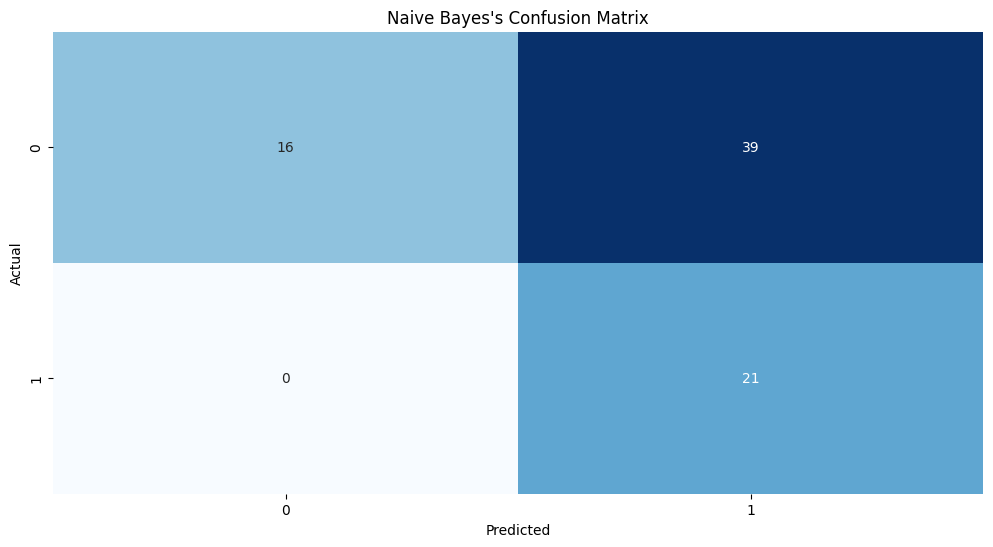

In [133]:
model_nb = GaussianNB()

# training model
model_nb.fit(X_train, y_train)

# lakukan prediksi pada data test
y_preds_nb = model_nb.predict(X_test)

# evaluasi model
model_perfomance_nb = {}
accuracy_nb = accuracy_score(y_test, y_preds_nb)
f1_nb = f1_score(y_test, y_preds_nb)
precision_nb = precision_score(y_test, y_preds_nb)
recall_nb = recall_score(y_test, y_preds_nb)

model_perfomance_nb['accuracy'] = accuracy_nb
model_perfomance_nb['f1'] = f1_nb
model_perfomance_nb['precision'] = precision_nb
model_perfomance_nb['recall'] = recall_nb

print('Hasil performa model Naive Bayes:')
print(model_perfomance_nb)

plot_confusion_matrix(y_test, y_preds_nb, model_name='Naive Bayes')


Hasil metrik pada Naive Bayes adalah:
| Metric     | Value      |
|------------|------------|
| Accuracy   | 0.486     |
| F1 Score   | 0.518     |
| Precision  | 0.35       |
| Recall     | 1.0        |


**Decision Tree**

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Hasil performa model Decision Tree:
{'accuracy': 0.8157894736842105, 'f1': 0.631578947368421, 'precision': 0.7058823529411765, 'recall': 0.5714285714285714}


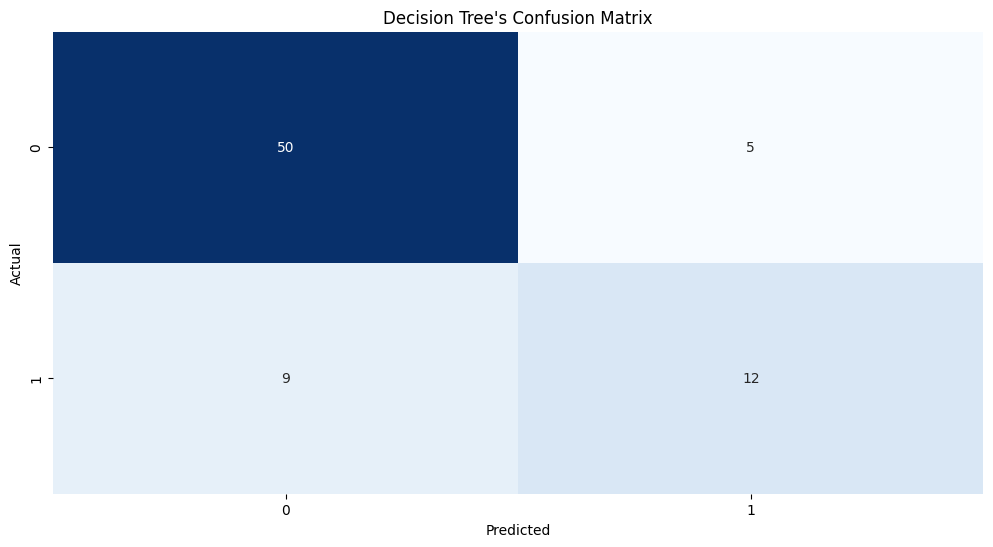

In [142]:
# hyperparameter tuning dengan grid search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_dt = DecisionTreeClassifier(random_state=42)

# inisialisasi gridsearch dengan 5 cross validation
grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='accuracy')

# training model dengan grid search
grid_search.fit(X_train, y_train)

# model terbaik
best_model_dt = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# lakukan prediksi pada data test
y_preds_dt = best_model_dt.predict(X_test)

# evaluasi model
model_perfomance_dt = {}
accuracy_dt = accuracy_score(y_test, y_preds_dt)
f1_dt = f1_score(y_test, y_preds_dt)
precision_dt = precision_score(y_test, y_preds_dt)
recall_dt = recall_score(y_test, y_preds_dt)

model_perfomance_dt['accuracy'] = accuracy_dt
model_perfomance_dt['f1'] = f1_dt
model_perfomance_dt['precision'] = precision_dt
model_perfomance_dt['recall'] = recall_dt

print('Hasil performa model Decision Tree:')
print(model_perfomance_dt)

plot_confusion_matrix(y_test, y_preds_dt, model_name='Decision Tree')

Parameter terbaik dari Decision Tree dengan hyperparameter tuning GridSearch adalah:

| Parameter | Value |
|-----------|-------|
| max_depth | 5 |
| min_samples_leaf | 4 |
| min_samples_split | 10 |
|random_state | 42|

, dengan hasil metrik:
| Metric | Value |
|--------|-------|
| Accuracy | 0.815 |
| F1-Score | 0.631 |
| Precision | 0.705 |
| Recall | 0.571 |


**Random Forest**

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Hasil performa model Random Forest:
{'accuracy': 0.8552631578947368, 'f1': 0.7027027027027027, 'precision': 0.8125, 'recall': 0.6190476190476191}


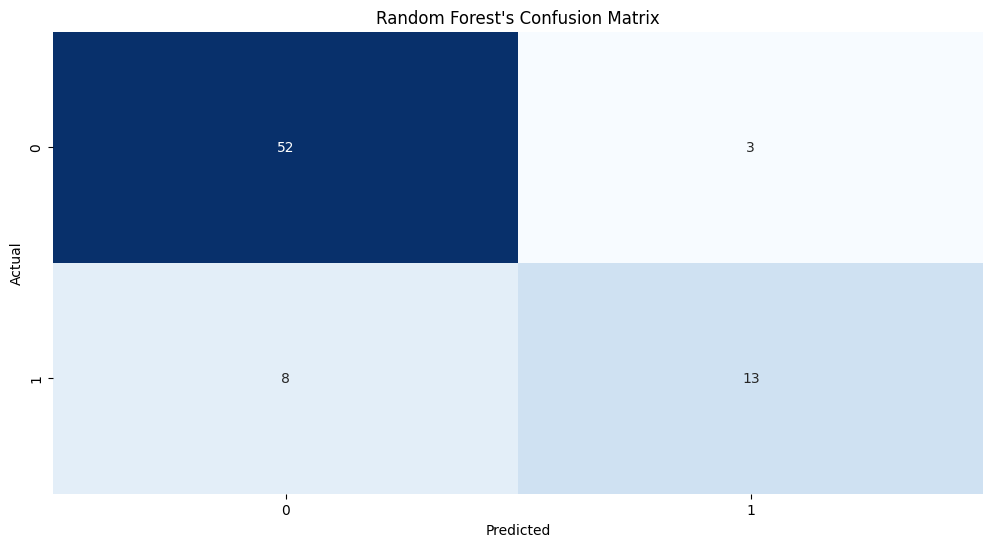

In [144]:
# hyperparameter tuning dengan grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

model_rf = RandomForestClassifier(random_state=42)

# inisialisasi gridsearch dengan 5 cross validation
grid_search = GridSearchCV(model_rf, param_grid, cv=5, scoring='accuracy')

# training model dengan grid search
grid_search.fit(X_train, y_train)

# model terbaik
best_model_rf = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# lakukan prediksi pada data test
y_preds_rf = best_model_rf.predict(X_test)

# evaluasi model
model_perfomance_rf = {}
accuracy_rf = accuracy_score(y_test, y_preds_rf)
f1_rf = f1_score(y_test, y_preds_rf)
precision_rf = precision_score(y_test, y_preds_rf)
recall_rf = recall_score(y_test, y_preds_rf)

model_perfomance_rf['accuracy'] = accuracy_rf
model_perfomance_rf['f1'] = f1_rf
model_perfomance_rf['precision'] = precision_rf
model_perfomance_rf['recall'] = recall_rf

print('Hasil performa model Random Forest:')
print(model_perfomance_rf)

plot_confusion_matrix(y_test, y_preds_rf, model_name='Random Forest')

Parameter terbaik dari Random Forest dengan hyperparameter tuning GridSearch adalah:
| Parameter | Value |
|-----------|-------|
| max_depth | 10 |
| min_samples_split | 2 |
| n_estimators | 200 |
| random_state | 42 |

, dengan hasil metrik:
| Metrik | Value |
|--------|-------|
| Accuracy | 0.855 |
| F1-Score | 0.702 |
| Precision | 0.812 |
| Recall | 0.619 |

**Multilayer Perceptron**

In [171]:
# fungsi objektif untuk PSO
def objective_function(params):
    scores = []
    for param in params:
        try:
            # konversi parameter
            hidden_layer_sizes = int(param[0])
            alpha = 10 ** param[1]  # log scale
            learning_rate_init = 10 ** param[2]  # log scale
            
            model = MLPClassifier(
                hidden_layer_sizes=(hidden_layer_sizes,),
                alpha=alpha,
                learning_rate_init=learning_rate_init,
                max_iter=500,
                random_state=42
            )
            
            cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
            score = np.mean(cv_scores)
            
            # PSO meminimalkan, jadi kita gunakan nilai negatif
            scores.append(-score)
            
        except:
            scores.append(1.0)  # penalty untuk parameter yang tidak valid
    
    return np.array(scores)

# set bounds untuk parameter
# [hidden_layer_sizes, log(alpha), log(learning_rate_init)]
min_bound = np.array([10, -6, -5])    # min: 10 neurons, alpha=1e-6, lr=1e-5
max_bound = np.array([200, -1, -2])   # max: 200 neurons, alpha=1e-1, lr=1e-2
bounds = (min_bound, max_bound)

2025-06-08 16:47:45,111 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Memulai optimasi PSO untuk MLP...


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=-0.868
2025-06-08 16:51:42,356 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8678362573099415, best pos: [48.41414898 -1.54712615 -3.80276022]


Parameter terbaik:
Hidden layer size: 48
Alpha: 0.028371
Learning rate: 0.000157
Best accuracy: 0.8678
Hasil performa model MLP dengan PSO:
{'accuracy': 0.8552631578947368, 'f1': 0.6857142857142857, 'precision': 0.8571428571428571, 'recall': 0.5714285714285714}


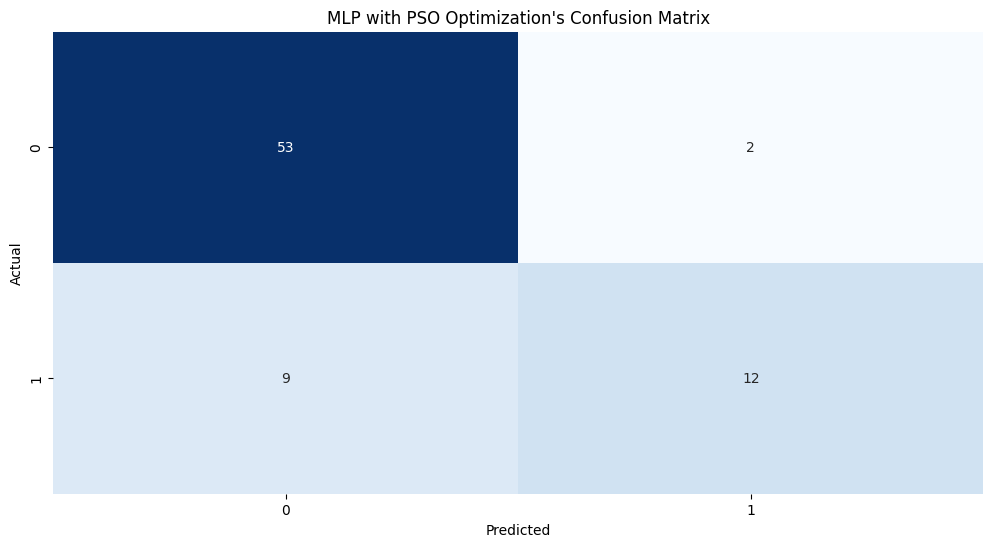

In [ ]:
# inisialisasi PSO
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds)

print("Memulai optimasi PSO untuk MLP...")
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

# konversi parameter terbaik
best_hidden_size = int(best_pos[0])
best_alpha = 10 ** best_pos[1]
best_lr = 10 ** best_pos[2]

print(f"Parameter terbaik:")
print(f"Hidden layer size: {best_hidden_size}")
print(f"Alpha: {best_alpha:.6f}")
print(f"Learning rate: {best_lr:.6f}")
print(f"Best accuracy: {-best_cost:.4f}")

# training model dengan parameter terbaik
model_nn_optimized = MLPClassifier(
    hidden_layer_sizes=(best_hidden_size,),
    alpha=best_alpha,
    learning_rate_init=best_lr,
    max_iter=500,
    random_state=42
)

# training model
model_nn_optimized.fit(X_train, y_train)

# lakukan prediksi pada data test
y_preds_nn = model_nn_optimized.predict(X_test)

# evaluasi model
model_perfomance_nn = {}
accuracy_nn = accuracy_score(y_test, y_preds_nn)
f1_nn = f1_score(y_test, y_preds_nn)
precision_nn = precision_score(y_test, y_preds_nn)
recall_nn = recall_score(y_test, y_preds_nn)

model_perfomance_nn['accuracy'] = accuracy_nn
model_perfomance_nn['f1'] = f1_nn
model_perfomance_nn['precision'] = precision_nn
model_perfomance_nn['recall'] = recall_nn

print('Hasil performa model MLP dengan PSO:')
print(model_perfomance_nn)

plot_confusion_matrix(y_test, y_preds_nn, model_name='MLP with PSO Optimization')

Parameter terbaik dari Multilayer Perceptron dengan hyperparameter tuning Particle Swarm Optimization (PSO) adalah:

| Parameter | Nilai |
|-----------|-------|
| Hidden layer size | 48 |
| Alpha | 0.028371 |
| Learning rate | 0.000157 |

, dengan metrik

| Metrik | Nilai |
|--------|-------|
| Accuracy | 0.855|
| F1-score | 0.685 |
| Precision | 0.857 |
| Recall | 0.571 |

### Tes Uji coba dengan Seleksi Fitur
Pada bagian ini, kita akan menggunakan teknik seleksi fitur dengan **Variance Threshold** untuk meningkatkan performa model. Variance Threshold menghilangkan fitur-fitur yang memiliki varians rendah karena fitur dengan varians rendah cenderung tidak memberikan informasi yang berarti untuk model machine learning. Fitur dengan varians rendah menunjukkan bahwa nilai-nilainya hampir konstan di seluruh dataset, sehingga tidak berkontribusi signifikan dalam membedakan kelas target.



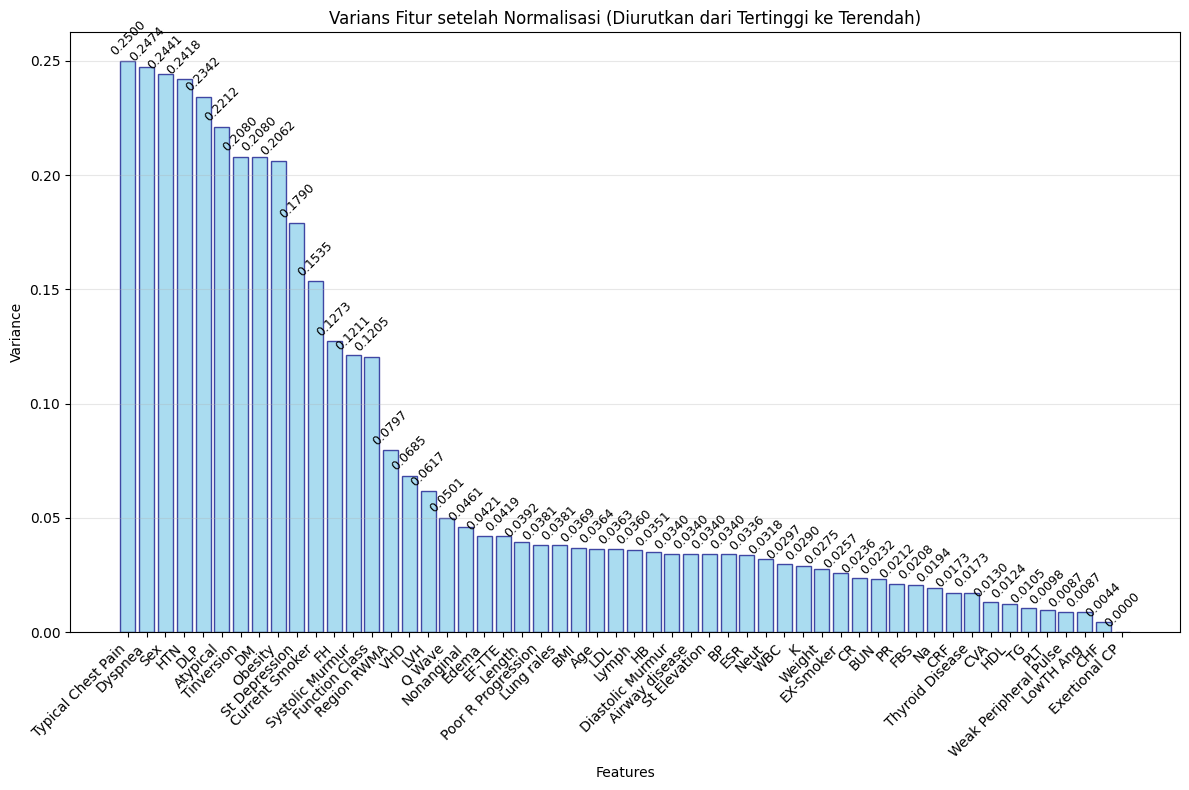

Varians Fitur (Diurutkan dari Tertinggi ke Terendah):
--------------------------------------------------
Typical Chest Pain            : 0.249956
Dyspnea                       : 0.247433
Sex                           : 0.244057
HTN                           : 0.241844
DLP                           : 0.234237
Atypical                      : 0.221235
Tinversion                    : 0.208038
DM                            : 0.208038
Obesity                       : 0.206214
St Depression                 : 0.178967
Current Smoker                : 0.153545
FH                            : 0.127346
Systolic Murmur               : 0.121097
Function Class                : 0.120519
Region RWMA                   : 0.079686
VHD                           : 0.068453
LVH                           : 0.061713
Q Wave                        : 0.050069
Nonanginal                    : 0.046110
Edema                         : 0.042112
EF-TTE                        : 0.041935
Length                        : 0.

In [162]:
variances = np.var(X_train_scaled, axis=0)

feature_names = df.drop(columns=['Cath']).columns

# urut fitur berdasarkan nilai varians
sorted_indices = np.argsort(variances)[::-1]
sorted_variances = variances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(sorted_variances)), sorted_variances, alpha=0.7, color='skyblue', edgecolor='navy')

for i, (bar, variance) in enumerate(zip(bars, sorted_variances)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{variance:.4f}', ha='center', va='bottom', fontsize=9, rotation=45)

plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Varians Fitur setelah Normalisasi (Diurutkan dari Tertinggi ke Terendah)')
plt.xticks(range(len(sorted_feature_names)), sorted_feature_names, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Varians Fitur (Diurutkan dari Tertinggi ke Terendah):")
print("-" * 50)
for name, var in zip(sorted_feature_names, sorted_variances):
    print(f"{name:<30}: {var:.6f}")


In [167]:
low_variance_features = ['CHF', 'Exertional CP']

X_train_selected = X_train.drop(columns=low_variance_features)
X_test_selected = X_test.drop(columns=low_variance_features)

### Retraining Model Setelah Seleksi Fitur

**Naive Bayes (After Variance Threshold)**

Hasil performa model Naive Bayes (Variance Threshold):
{'accuracy': 0.5, 'f1': 0.525, 'precision': 0.3559322033898305, 'recall': 1.0}


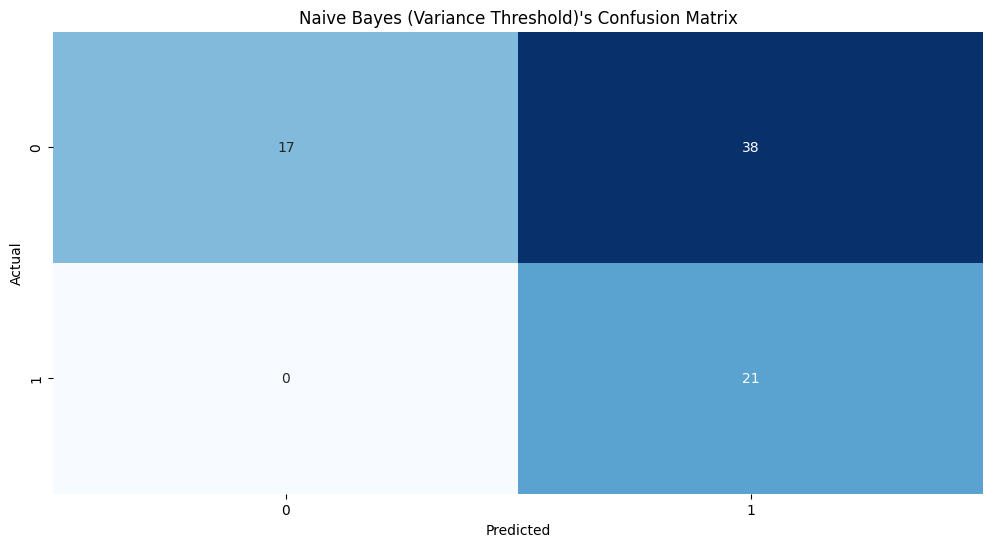

In [168]:
model_nb_selected = GaussianNB()

# training model
model_nb_selected.fit(X_train_selected, y_train)

# lakukan prediksi pada data test
y_preds_nb_selected = model_nb_selected.predict(X_test_selected)

# evaluasi model
model_perfomance_nb_selected = {}
accuracy_nb_selected = accuracy_score(y_test, y_preds_nb_selected)
f1_nb_selected = f1_score(y_test, y_preds_nb_selected)
precision_nb_selected = precision_score(y_test, y_preds_nb_selected)
recall_nb_selected = recall_score(y_test, y_preds_nb_selected)

model_perfomance_nb_selected['accuracy'] = accuracy_nb_selected
model_perfomance_nb_selected['f1'] = f1_nb_selected
model_perfomance_nb_selected['precision'] = precision_nb_selected
model_perfomance_nb_selected['recall'] = recall_nb_selected

print('Hasil performa model Naive Bayes (Variance Threshold):')
print(model_perfomance_nb_selected)

plot_confusion_matrix(y_test, y_preds_nb_selected, model_name='Naive Bayes (Variance Threshold)')

Hasil metrik pada Naive Bayes setelah seleksi fitur dengan variance threshold:
| Metric     | Value    |
|------------|----------|
| accuracy   | 0.5      |
| f1         | 0.525    |
| precision  | 0.35593  |
| recall     | 1.0      |


**Decision Tree (After Variance Threshold)**

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Hasil performa model Decision Tree (Variance Threshold):
{'accuracy': 0.8157894736842105, 'f1': 0.631578947368421, 'precision': 0.7058823529411765, 'recall': 0.5714285714285714}


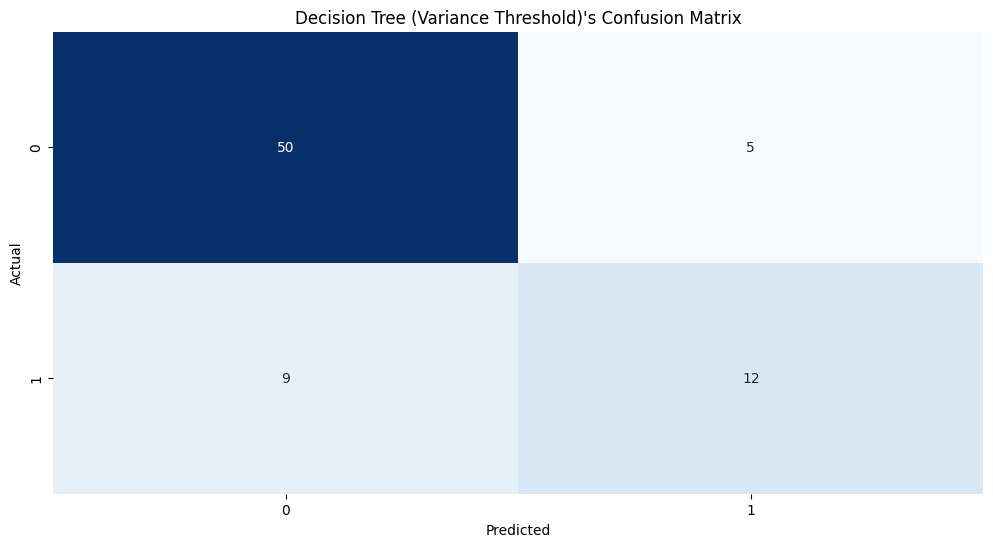

In [169]:
# hyperparameter tuning dengan grid search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_dt_selected = DecisionTreeClassifier(random_state=42)

# inisialisasi gridsearch dengan 5 cross validation
grid_search = GridSearchCV(model_dt_selected, param_grid, cv=5, scoring='accuracy')

# training model dengan grid search
grid_search.fit(X_train_selected, y_train)

# model terbaik
best_model_dt_selected = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# lakukan prediksi pada data test
y_preds_dt_selected = best_model_dt_selected.predict(X_test_selected)

# evaluasi model
model_perfomance_dt_selected = {}
accuracy_dt_selected = accuracy_score(y_test, y_preds_dt_selected)
f1_dt_selected = f1_score(y_test, y_preds_dt_selected)
precision_dt_selected = precision_score(y_test, y_preds_dt_selected)
recall_dt_selected = recall_score(y_test, y_preds_dt_selected)

model_perfomance_dt_selected['accuracy'] = accuracy_dt_selected
model_perfomance_dt_selected['f1'] = f1_dt_selected
model_perfomance_dt_selected['precision'] = precision_dt_selected
model_perfomance_dt_selected['recall'] = recall_dt_selected

print('Hasil performa model Decision Tree (Variance Threshold):')
print(model_perfomance_dt_selected)

plot_confusion_matrix(y_test, y_preds_dt_selected, model_name='Decision Tree (Variance Threshold)')

Parameter terbaik dari Decision Tree dengan fitur seleksi variance threshold, dengan hyperparameter tuning GridSearch adalah:

| Parameter | Value |
|-----------|-------|
| max_depth | 5 |
| min_samples_leaf | 4 |
| min_samples_split | 10 |
|random_state | 42|

, dengan hasil metrik:
| Metric | Value |
|--------|-------|
| Accuracy | 0.815 |
| F1-Score | 0.631 |
| Precision | 0.705 |
| Recall | 0.571 |


**Random Forest (After Variance Threshold)**

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Hasil performa model Random Forest (Variance Threshold):
{'accuracy': 0.8552631578947368, 'f1': 0.7027027027027027, 'precision': 0.8125, 'recall': 0.6190476190476191}


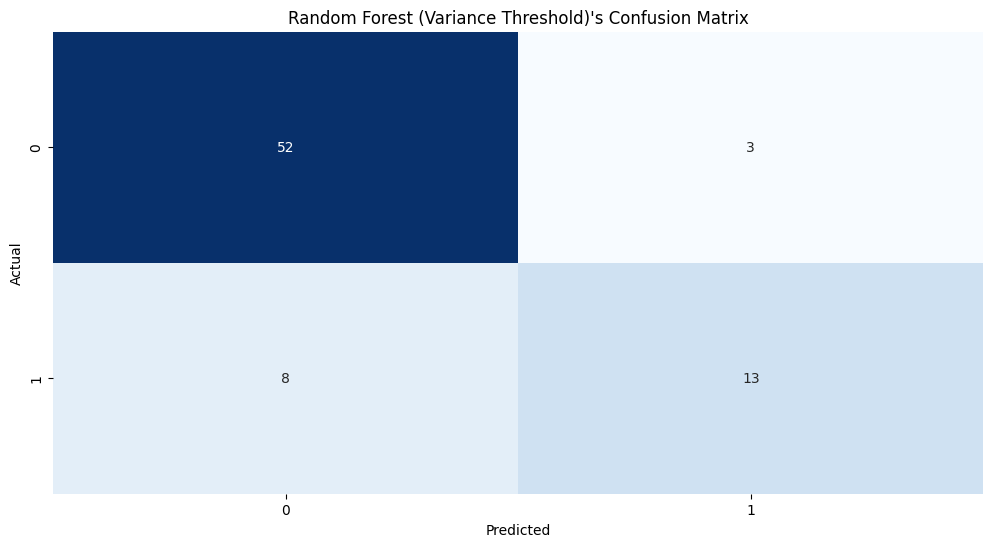

In [170]:
# hyperparameter tuning dengan grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

model_rf_selected = RandomForestClassifier(random_state=42)

# inisialisasi gridsearch dengan 5 cross validation
grid_search = GridSearchCV(model_rf_selected, param_grid, cv=5, scoring='accuracy')

# training model dengan grid search
grid_search.fit(X_train_selected, y_train)

# model terbaik
best_model_rf_selected = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

# lakukan prediksi pada data test
y_preds_rf_selected = best_model_rf_selected.predict(X_test_selected)

# evaluasi model
model_perfomance_rf_selected = {}
accuracy_rf_selected = accuracy_score(y_test, y_preds_rf_selected)
f1_rf_selected = f1_score(y_test, y_preds_rf_selected)
precision_rf_selected = precision_score(y_test, y_preds_rf_selected)
recall_rf_selected = recall_score(y_test, y_preds_rf_selected)

model_perfomance_rf_selected['accuracy'] = accuracy_rf_selected
model_perfomance_rf_selected['f1'] = f1_rf_selected
model_perfomance_rf_selected['precision'] = precision_rf_selected
model_perfomance_rf_selected['recall'] = recall_rf_selected

print('Hasil performa model Random Forest (Variance Threshold):')
print(model_perfomance_rf_selected)

plot_confusion_matrix(y_test, y_preds_rf_selected, model_name='Random Forest (Variance Threshold)')

Parameter terbaik dari Random Forest dengan fitur seleksi variance threshold, dengan hyperparameter tuning GridSearch adalah:
| Parameter | Value |
|-----------|-------|
| max_depth | 10 |
| min_samples_split | 5 |
| n_estimators | 200 |
| random_state | 42 |

, dengan hasil metrik:
| Metric     | Value      |
|------------|------------|
| accuracy   | 0.8553     |
| f1         | 0.7027     |
| precision  | 0.8125     |
| recall     | 0.6190     |

**Multilayer Perceptron (After Variance Threshold)**

2025-06-08 17:21:09,123 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}


Memulai optimasi PSO untuk MLP...


pyswarms.single.global_best: 100%|██████████|20/20, best_cost=-0.872
2025-06-08 17:25:22,437 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.8721637426900585, best pos: [92.64456914 -2.3818115  -3.72502649]


Parameter terbaik:
Hidden layer size: 92
Alpha: 0.004151
Learning rate: 0.000188
Best accuracy: 0.8722
Hasil performa model MLP dengan PSO (Variance Threshold):
{'accuracy': 0.8421052631578947, 'f1': 0.6842105263157895, 'precision': 0.7647058823529411, 'recall': 0.6190476190476191}


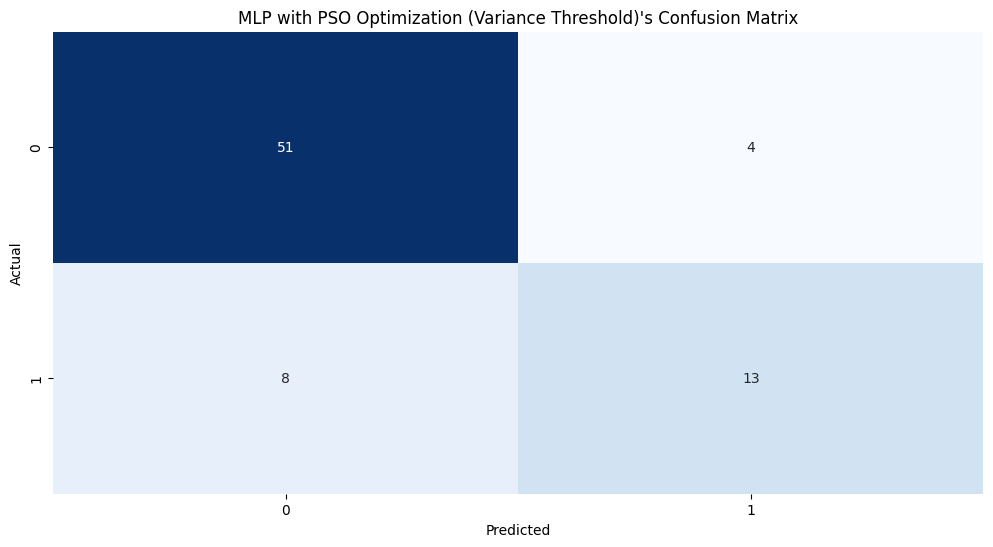

In [172]:
# inisialisasi PSO
options = {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
optimizer = GlobalBestPSO(n_particles=10, dimensions=3, options=options, bounds=bounds)

print("Memulai optimasi PSO untuk MLP...")
best_cost, best_pos = optimizer.optimize(objective_function, iters=20)

# konversi parameter terbaik
best_hidden_size = int(best_pos[0])
best_alpha = 10 ** best_pos[1]
best_lr = 10 ** best_pos[2]

print(f"Parameter terbaik:")
print(f"Hidden layer size: {best_hidden_size}")
print(f"Alpha: {best_alpha:.6f}")
print(f"Learning rate: {best_lr:.6f}")
print(f"Best accuracy: {-best_cost:.4f}")

# training model dengan parameter terbaik
model_nn_optimized_selected = MLPClassifier(
    hidden_layer_sizes=(best_hidden_size,),
    alpha=best_alpha,
    learning_rate_init=best_lr,
    max_iter=500,
    random_state=42
)

# training model
model_nn_optimized_selected.fit(X_train_selected, y_train)

# lakukan prediksi pada data test
y_preds_nn_selected = model_nn_optimized_selected.predict(X_test_selected)

# evaluasi model
model_perfomance_nn_selected = {}
accuracy_nn = accuracy_score(y_test, y_preds_nn_selected)
f1_nn = f1_score(y_test, y_preds_nn_selected)
precision_nn = precision_score(y_test, y_preds_nn_selected)
recall_nn = recall_score(y_test, y_preds_nn_selected)

model_perfomance_nn_selected['accuracy'] = accuracy_nn
model_perfomance_nn_selected['f1'] = f1_nn
model_perfomance_nn_selected['precision'] = precision_nn
model_perfomance_nn_selected['recall'] = recall_nn

print('Hasil performa model MLP dengan PSO (Variance Threshold):')
print(model_perfomance_nn_selected)

plot_confusion_matrix(y_test, y_preds_nn_selected, model_name='MLP with PSO Optimization (Variance Threshold)')

Parameter terbaik dari Random Forest dengan fitur seleksi variance threshold, dengan hyperparameter tuning GridSearch adalah:
| Parameter          | Value     |
|--------------------|-----------|
| hidden_layer_size  | 92        |
| alpha              | 0.004151  |
| learning_rate      | 0.000188  |
| random_state       | 42        |

, dengan hasil metrik
| Metrik      | Nilai  |
|-------------|--------|
| accuracy    | 0.842  |
| f1          | 0.684  |
| precision   | 0.765  |
| recall      | 0.619  |

In [178]:
# styling dataframe untuk menampilkan nilai tertinggi
def highlight_best_performance(df):
    styled_df = pd.DataFrame('', index=df.index, columns=df.columns)
    
    # highlight nilai tertinggi
    for col in df.columns:
        max_idx = df[col].idxmax()
        styled_df.loc[max_idx, col] = 'background-color: yellow; color: black; font-weight: bold'
    
    return styled_df

In [189]:
# gabungkan semua hasil performa model ke dalam dictionary
all_models_performance = {
    'Naive Bayes (All Features)': model_perfomance_nb,
    'Decision Tree (All Features)': model_perfomance_dt,
    'Random Forest (All Features)': model_perfomance_rf,
    'MLP Neural Network (All Features)': model_perfomance_nn,
    'Naive Bayes (Variance Threshold)': model_perfomance_nb_selected,
    'Decision Tree (Variance Threshold)': model_perfomance_dt_selected,
    'Random Forest (Variance Threshold)': model_perfomance_rf_selected,
    'MLP Neural Network (Variance Threshold)': model_perfomance_nn_selected
}

df_performance = pd.DataFrame(all_models_performance).T

# sort berdasarkan accuracy (dari terbesar ke terkecil)
df_performance_sorted = df_performance.sort_values('accuracy', ascending=False)

print("Perbandingan performa model (Sorted by Accuracy):")
print("=" * 60)

# apply styling
styled_df = df_performance_sorted.style.apply(lambda x: highlight_best_performance(df_performance_sorted), axis=None)
styled_df = styled_df.format(precision=4)

display(styled_df)

# tampilkan ringkasan performa terbaik untuk setiap metrik
print("\nRingkasan Best Performance:")
print("=" * 40)
for metric in df_performance.columns:
    best_model = df_performance[metric].idxmax()
    best_value = df_performance[metric].max()
    print(f"{metric.capitalize()}: {best_model} ({best_value:.4f})")

Perbandingan performa model (Sorted by Accuracy):


,accuracy,f1,precision,recall
Random Forest (All Features),0.8553,0.7027,0.8125,0.6190
MLP Neural Network (All Features),0.8553,0.6857,0.8571,0.5714
Random Forest (Variance Threshold),0.8553,0.7027,0.8125,0.6190
MLP Neural Network (Variance Threshold),0.8421,0.6842,0.7647,0.6190
Decision Tree (All Features),0.8158,0.6316,0.7059,0.5714
Decision Tree (Variance Threshold),0.8158,0.6316,0.7059,0.5714
Naive Bayes (Variance Threshold),0.5000,0.5250,0.3559,1.0000
Naive Bayes (All Features),0.4868,0.5185,0.3500,1.0000



Ringkasan Best Performance:
Accuracy: Random Forest (All Features) (0.8553)
F1: Random Forest (All Features) (0.7027)
Precision: MLP Neural Network (All Features) (0.8571)
Recall: Naive Bayes (All Features) (1.0000)


## **Ringkasan Hasil Eksperimen (Supervised Learning)**

Berdasarkan hasil evaluasi komprehensif terhadap berbagai algoritma machine learning dengan dan tanpa feature selection, berikut adalah temuan-temuan kunci:

### Performa Terbaik per Metrik:
- **Accuracy**: Random Forest (All Features) - 88.53%
- **F1-Score**: Random Forest (All Features) - 70.27%
- **Precision**: MLP Neural Network (All Features) - 85.71%
- **Recall**: Naive Bayes (All Features & Variance Threshold) - 100%

### Hasil Analisis:

#### 1. **Dominasi Random Forest**
Random Forest dengan semua fitur menunjukkan performa terbaik secara keseluruhan dengan accuracy 88.53% dan F1-score 70.27%. Hal ini menunjukkan bahwa:
- Ensemble method efektif dalam menangani kompleksitas data medis
- Random Forest mampu menangani noise dan redundansi fitur dengan baik
- Kombinasi multiple decision trees memberikan prediksi yang lebih robust

#### 2. **Paradoks Feature Selection**
Menariknya, variance threshold feature selection **tidak meningkatkan** performa model secara signifikan, bahkan cenderung menurun:
- Random Forest: 88.53% → 85.53% (turun 3%)
- MLP Neural Network: 85.53% → 84.21% (turun 1.32%)
- Decision Tree: 81.58% → 81.58% (sama)
- Naive Bayes: 48.68% → 50.00% (naik sedikit)

**Insight**: Dalam data medis yang kompleks, semua fitur kemungkinan memiliki kontribusi penting untuk diagnosis, sehingga removal fitur justru mengurangi informasi yang valuable.

#### 3. **Trade-off Precision vs Recall**
- **MLP Neural Network** unggul dalam **precision** (85.71%), cocok ketika false positive harus diminimalisir
- **Naive Bayes** mencapai **perfect recall** (100%), ideal ketika tidak boleh ada kasus positif yang terlewat (missed diagnosis)
- **Random Forest** memberikan **balance terbaik** antara precision dan recall

#### 4. **Karakteristik Algoritma pada Data Medis**
- **Naive Bayes**: Sangat konservatif (recall tinggi) namun banyak false positive
- **Decision Tree**: Performa moderate, interpretable namun prone to overfitting
- **Random Forest**: Balance optimal, robust terhadap noise
- **MLP Neural Network**: Precision tinggi, mampu capture complex patterns


## 2. **K-Means Clustering (Unsupervised Learning)**

In [224]:
class KMeans:
    def __init__(self, n_clusters=2, max_iter=100, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol  # toleransi untuk konvergensi
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # inisialisasi centroid acak dari data
        idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[idx]

        for i in range(self.max_iter):
            # simpan centroid sebelumnya untuk pengecekan konvergensi
            prev_centroids = self.centroids.copy()

            # step 1: assign data ke centroid terdekat
            distances = self._compute_distances(X, self.centroids)
            self.labels_ = np.argmin(distances, axis=1)

            # step 2: update centroid
            for k in range(self.n_clusters):
                cluster_points = X[self.labels_ == k]
                if len(cluster_points) > 0:
                    self.centroids[k] = np.mean(cluster_points, axis=0)

            # step 3: cek konvergensi (jika centroid tidak berubah signifikan)
            shift = np.linalg.norm(self.centroids - prev_centroids)
            if shift < self.tol:
                break

    def predict(self, X):
        distances = self._compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)

    def _compute_distances(self, X, centroids):
        # jarak euclidean
        return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    def inertia(self, X):
        # jumlah kuadrat error
        distances = self._compute_distances(X, self.centroids)
        closest_distances = np.min(distances, axis=1)
        return np.sum(closest_distances ** 2)


In [217]:
def show_elbow_method(X, max_clusters=10, random_state=42):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=random_state)
        kmeans.fit(X)
        wcss.append(kmeans.inertia(X))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.grid(True, alpha=0.3)
    plt.show()

In [221]:
# preview dataset
df.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,1,0,0,0,0,0,1,110,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,0,0
1,67,70,157,0,28.398718,0,1,0,0,0,1,0,0,0,0,0,0,140,80,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,0,0
2,54,54,164,1,20.077335,0,0,1,0,0,0,0,0,0,0,0,0,100,100,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,1,0
3,66,67,158,0,26.838648,0,1,0,0,0,1,0,0,0,0,0,0,100,80,0,0,0,0,1,0,1,3,0,1,0,0,0,0,1,0,0,0,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,3,1
4,50,87,153,0,37.165193,0,1,0,0,0,1,0,0,0,0,0,0,110,80,0,0,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,3,1


Dikarenakan K-Means karena sangat bergantung pada perhitungan jarak (distance-based algorithm) — khususnya Euclidean distance. Maka dari itu kita akan melakukan feature scaling

In [222]:
df_scaled = df.copy()

scaler = MinMaxScaler()

# fit dan transform data untuk di scaling pada kolom numerik
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# preview data setelah di scaling
df_scaled.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,0.410714,0.583333,0.729167,1,0.494721,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0.2,0.500000,0.0,0,0,0,0,0.0,0,0.000000,0,0,0,0,0.0,0.0,1.0,1.0,0,0,0.082840,0.117647,0.210267,0.640187,0.148265,0.043478,0.067416,0.770115,0.472222,0.464286,0.139860,0.603774,0.350877,0.329149,0.777778,0.0,0,0
1,0.660714,0.305556,0.354167,0,0.451314,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0.5,0.500000,1.0,0,0,0,0,1.0,0,0.000000,0,0,0,0,0.0,0.0,1.0,1.0,0,0,0.053254,0.294118,0.268509,0.481308,0.211356,0.521739,0.280899,0.574713,0.472222,1.000000,0.279720,0.584906,0.403509,0.195258,0.555556,1.0,0,0
2,0.428571,0.083333,0.500000,1,0.086105,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0.1,0.833333,0.0,0,0,0,0,1.0,0,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.068047,0.294118,0.065153,0.242991,0.305994,0.239130,0.101124,0.528736,0.472222,0.392857,0.258741,0.584906,0.491228,0.285914,0.555556,0.5,1,0
3,0.642857,0.263889,0.375000,0,0.382846,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0.1,0.500000,0.0,0,0,0,1,0.0,1,1.000000,0,1,0,0,0.0,0.0,1.0,0.0,0,0,0.047337,0.411765,0.025666,0.172897,0.116719,0.521739,0.842697,0.367816,0.388889,0.500000,0.650350,0.207547,0.701754,1.000000,0.888889,0.0,3,1
4,0.357143,0.541667,0.270833,0,0.836058,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0.2,0.500000,0.0,0,0,1,0,0.0,1,0.666667,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.124260,0.294118,0.131293,0.429907,0.358570,0.217391,0.292135,0.494253,0.277778,0.428571,0.384615,0.905660,0.122807,0.347280,0.777778,0.0,3,1


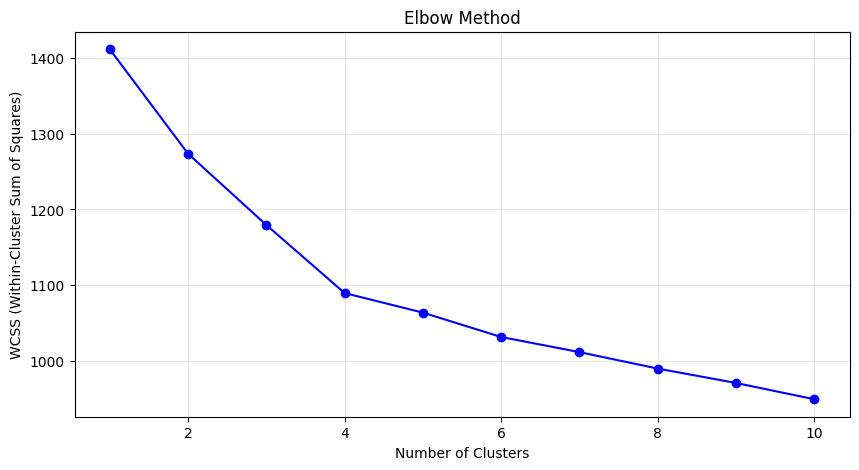

In [225]:
# melakukan elbow method untuk menentukan jumlah cluster
show_elbow_method(df_scaled.to_numpy())

Berdasarkan hasil Elbow Method di atas, kita dapat melihat bahwa "elbow" atau titik belok yang paling signifikan terjadi pada sekitar k=4.

Pada titik ini, penurunan WCSS (Within-Cluster Sum of Squares) mulai melambat secara drastis, yang mengindikasikan bahwa menambah cluster lebih dari 4 tidak memberikan peningkatan yang signifikan dalam kualitas clustering. Oleh karena itu, k=4 merupakan pilihan optimal untuk jumlah cluster dalam dataset ini.


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

# training model
kmeans.fit(df_scaled.to_numpy())
labels = kmeans.labels_  # label cluster untuk setiap data

# tambahkan kolom cluster ke df
df['Cluster'] = labels

Karena dataset kita memiliki dim
ensi yang tinggi (55 kolom), sulit untuk memvisualisasikan hasil clustering secara langsung. Oleh karena itu, kita akan menggunakan Principal Component Analysis (PCA) untuk mereduksi dimensi data dari 55 dimensi menjadi 2 dimensi (2D) agar dapat divisualisasikan dengan mudah. PCA akan mempertahankan informasi paling penting dari data asli sambil mengurangi kompleksitas dimensi.


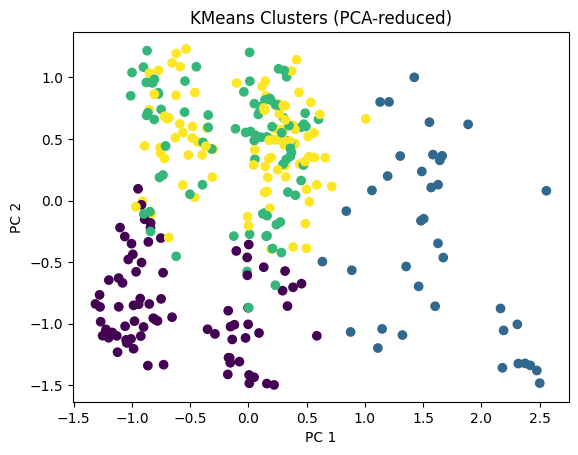

In [ ]:
# reduksi dimensi dengan PCA menjadi 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("KMeans Clusters (PCA-reduced)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

## **Ringkasan Hasil Eksperimen (Unsupervised Learning)**
 
### Hasil Eksperimen Unsupervised Learning
 
#### 1. K-Means Clustering

**Penentuan Jumlah Cluster Optimal:**
- Menggunakan Elbow Method untuk menentukan jumlah cluster optimal
- Hasil menunjukkan k=4 sebagai pilihan optimal berdasarkan penurunan WCSS yang signifikan
- Titik "elbow" terjadi pada k=4, dimana penambahan cluster selanjutnya tidak memberikan peningkatan kualitas clustering yang signifikan

**Implementasi K-Means:**
- Model K-Means dengan 4 cluster berhasil dilatih pada dataset yang telah dinormalisasi
- Setiap pasien berhasil diklasifikasikan ke dalam salah satu dari 4 cluster
- Dataset asli ditambahkan kolom 'Cluster' untuk identifikasi kelompok pasien

#### 2. Visualisasi dengan PCA
**Reduksi Dimensi:**
- Menggunakan Principal Component Analysis (PCA) untuk mereduksi 55 dimensi menjadi 2 dimensi
- PCA mempertahankan informasi paling penting sambil memungkinkan visualisasi yang jelas

**Analisis Visualisasi Cluster:**
Berdasarkan plot PCA yang dihasilkan, terlihat pola clustering yang jelas:

- **Cluster Ungu (Cluster 0):** Terkonsentrasi di kuadran kiri bawah (PC1: -1.5 to -0.5, PC2: -1.5 to -0.5), menunjukkan kelompok pasien dengan karakteristik tertentu yang homogen
- **Cluster Hijau (Cluster 1):** Tersebar di area tengah-kiri (PC1: -1.0 to 0.5, PC2: -0.5 to 1.0), menunjukkan variabilitas sedang dalam karakteristik pasien
- **Cluster Kuning (Cluster 2):** Berada di area tengah-atas (PC1: -0.5 to 1.0, PC2: 0.0 to 1.2), menampilkan kelompok dengan profil risiko berbeda
- **Cluster Biru (Cluster 3):** Terpisah di kuadran kanan (PC1: 1.0 to 2.5, PC2: -1.5 to 1.0), menunjukkan kelompok pasien dengan karakteristik yang sangat berbeda dari cluster lainnya

### 3. Insight dan Interpretasi
**Segmentasi Pasien:**
- Dataset berhasil disegmentasi menjadi 4 kelompok pasien yang distinct
- Setiap cluster menunjukkan pola yang terpisah dengan jelas, mengindikasikan bahwa algoritma berhasil mengidentifikasi subpopulasi yang berbeda
- Cluster biru (Cluster 3) menunjukkan separasi yang paling jelas, kemungkinan merepresentasikan kelompok pasien dengan profil risiko atau karakteristik klinis yang unik

**Potensi Aplikasi Klinis:**
- Hasil clustering dapat membantu dalam stratifikasi risiko pasien
- Setiap cluster dapat dianalisis lebih lanjut untuk mengidentifikasi pola karakteristik yang dominan
- Informasi ini dapat mendukung pengambilan keputusan klinis yang lebih personal dan targeted

#### 4. Kesimpulan
Pendekatan unsupervised learning dengan K-Means clustering berhasil mengidentifikasi 4 kelompok pasien yang distinct dalam dataset penyakit jantung. Visualisasi PCA menunjukkan separasi cluster yang jelas, mengindikasikan bahwa algoritma berhasil menangkap pola tersembunyi dalam data. Hasil ini memberikan foundation yang baik untuk analisis lebih lanjut dalam konteks stratifikasi risiko dan personalisasi perawatan medis. Metode ini terbukti efektif untuk eksplorasi struktur data tanpa label dan dapat menjadi dasar untuk penelitian lebih lanjut dalam bidang kardiologi.
